download this file: https://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

strip the header and footer, convert it to hdf5, renamed to "mamajek-spectral-class.hdf5"
Save into `/Data` directory.

This table can be used to classify the spectral class of the stars.

In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir
# import utils
root_dir = abspath(pardir)
if root_dir not in sys.path:
    sys.path.append(root_dir)
from scipy.stats import norm
from utils import style, load_spectral_types, safe_mkdir
style("seaborn-bright", tex=True)

In [2]:
# root data directory path
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [3]:
# create directory "Spectral-Class" in Data dir, if it doesn't exist
name = "Spectral-Class-metal"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Spectral-Class-metal already exist. Good to go!


In [4]:
# path to best-pars, created at 3.3. Best-pars.ipynb
gaia_dir = join(root_data_dir, "Neighbour")
files = glob(join(gaia_dir, "*.hdf5"))
files[:5]

['/home2/s20321005/Thesis-Project/Data/Neighbour/gaia-neighbour.hdf5']

In [5]:
# load best pars data
df = vaex.open(files[0])
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,1.0216929912567139,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,1.7350472211837769,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8169994354248047,6.956723606222691,171.9710106898086,-91.76705233314686,145.4401479088898,16.5177

# HR diagram

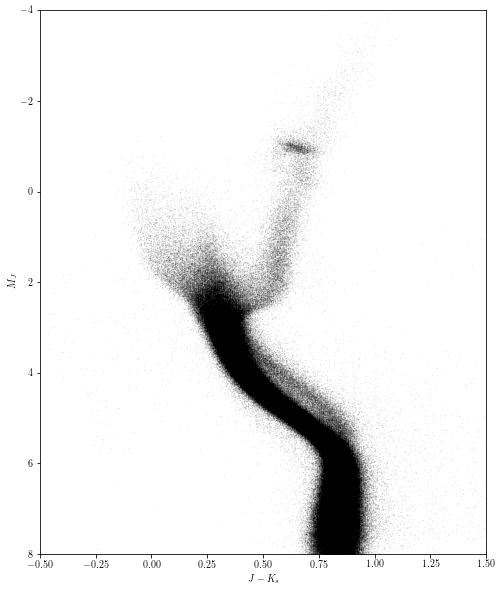

In [6]:
JK = np.linspace(0, 0.86, 100)
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.1, length_check=False)
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
plt.xlim(-0.5, 1.5)
plt.ylim(-4, 8)
plt.gca().invert_yaxis()
# to save it, uncomment the following line
# plt.savefig(join(gaia_dir, "HR-diagram.pdf"), format="pdf", dpi=70)
plt.show()

# load spectral type classification

In [7]:
spectral_types = load_spectral_types()
spectral_types

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


Example, for class `G2V`

In [8]:
spectral_types[spectral_types['SpT'] == "G2V"]

,SpT,M_J,J-H,H-Ks,J-K
39,G2V,3.6,0.293,0.073,0.366


In [9]:
# save classification values into numpy array
jk = spectral_types["J-K"].to_numpy()
mj = spectral_types["M_J"].to_numpy()
# cut it below M_J < 5
check = mj < 5
jk = jk[check]
mj = mj[check]

In [10]:
# hand drawn boundaries, need improvement
jk_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=0)
j_up = np.loadtxt(join(root_data_dir, "upper.csv"), delimiter=",", usecols=1)

jk_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=0)
j_low = np.loadtxt(join(root_data_dir, "lower.csv"), delimiter=",", usecols=1)

In [11]:
# interpolate the boundaries, to make it smooth
j_interp = interpolate.interp1d(jk, mj, kind='cubic')
jks = np.linspace(jk.min(), jk.max(), 100)

j_upper = interpolate.interp1d(jk_up, j_up, fill_value="extrapolate")(jks)
j_lower = interpolate.interp1d(jk_low, j_low, fill_value="extrapolate")(jks)

In [12]:
# interpolated boundaries
j_lower_interp = interpolate.interp1d(jks, j_lower, kind='cubic', fill_value="extrapolate")
j_upper_interp = interpolate.interp1d(jks, j_upper, kind='cubic', fill_value="extrapolate")

df_mask_65 = df.filter("JK < 0.65").filter("JK > -0.019")
df_mask_65 = df_mask_65.extract()
df_mask_65["M_J_lower"] = j_lower_interp(df_mask_65["JK"].to_numpy())
df_mask_65["M_J_upper"] = j_upper_interp(df_mask_65["JK"].to_numpy())
df_mask_65 = df_mask_65.filter("M_J > M_J_lower").filter("M_J < M_J_upper")
df_mask_65 = df_mask_65.extract()
df_mask_65

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.007952173857691683,-1.4305097809391984,10.581000328063965,10.03499984741211,AAA,4630919191216607488,23.898677825927734,-11.432337330045844,0.012411404401063919,-20.986865106700424,0.013343622907996178,5.7989536702346465,0.010386944748461246,11.89019775390625,12.349108695983887,11.273787498474121,1339.88916015625,1773.7681884765625,0.9732462167739868,1.2178672552108765,2.1822248974591814,-0.610213381765023,172.20570373535156,171.8430938720703,172.71620178222656,0.02449999935925007,0.016599999740719795,0.03139999881386757,nan,nan,nan,K,--,52.90816879272461,gaia,0.8756001591682434,0.8756001591682434,1.0,5061.03515625,gspphot,11.00146484375,9.6337890625,0.0,4.543600082397461,gspphot,0.004600048065185547,0.0034999847412109375,0.0,nan,--,nan,nan,nan,0.3846000134944916,gspphot,0.010100007057189941,0.009999990463256836,0.0,-0.07000000029802322,gspspec,0.03999999910593033,0.05000000074505806,0.0,nan,--,nan,nan,nan,0.5460004806518555,4.397748523260623,172.44490245419334,-98.81823128531313,141.32303969303314,6.221341729418895,23.07469936793523,0.012463924771994607,0.013294578248128389,18.86100169508465,5.085255284726619,0.03548808423919451,0.013665982834339866,-14.861544371355317,0.8756001591682434,0.5025981456637494,54.167759865437134,0.717864992065905,-26.93038823503761,0.4122335468333415,-47.27325057218564,0.5878608753657736,4.139207429566532,4.956685393986543
1,0.009443330810718078,-1.4068876919912512,10.062000274658203,9.657999992370605,AAA,4634292531547062400,80.03723907470703,79.93722242614324,0.013343079015612602,-3.9999700401274243,0.014623326249420643,5.629817906899334,0.012178930453956127,11.110095024108887,11.456314086914062,10.599123001098633,1518.1749267578125,2843.079345703125,0.7739794254302979,1.2011168003082275,2.1887579247061915,-0.633232475275951,176.5635986328125,175.789794921875,180.02969360351562,0.05849999934434891,0.042899999767541885,0.0820000022649765,-0.07999999821186066,-0.23999999463558197,0.07999999821186066,G,--,-47.79001235961914,gaia,0.26287636160850525,0.26287636160850525,1.0,5679.02001953125,gspphot,29.478515625,43.2470703125,0.0,4.461900234222412,gspphot,0.013100147247314453,0.008299827575683594,0.0,nan,--,nan,nan,nan,0.2199999988079071,gspspec,0.03999999165534973,0.01000000536441803,0.0,0.029999999329447746,gspspec,0.03999999910593033,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.40400028228759766,3.8144720150714813,177.62563843752412,-105.11061177622882,143.18738325133592,-78.6303006427475,-14.941054526363132,0.013417307513630478,0.014555249475654867,-12.579554015090025,-66.2024298494398,-0.0298452352969122,-0.1436599164229874,18.13929589425119,0.26287636160850525,0.15740752313701145,-45.96842835046593,0.21264428330506527,-27.326072934701195,0.16996727994296695,75.82310901664022,0.19226774705543745,3.0340236167686374,4.345114318156106
2,0.001975416007284742,-1.3798921433985867,7.301000118255615,6.857999801635742,AAA,4635422588982399616,173.8883514404297,162.425270464122,0.016481924802064896,-62.09016992304387,0.016419915482401848,24.939420796749136,0.013019759207963943,8.467083930969238,8.855419158935547,7.910074234008789,829.9010620117188,1157.595458984375,0.8579095005989075,1.2102466821670532,2.1985319392271805,-0.6591050745720846,39.90829849243164,39.79029846191406,40

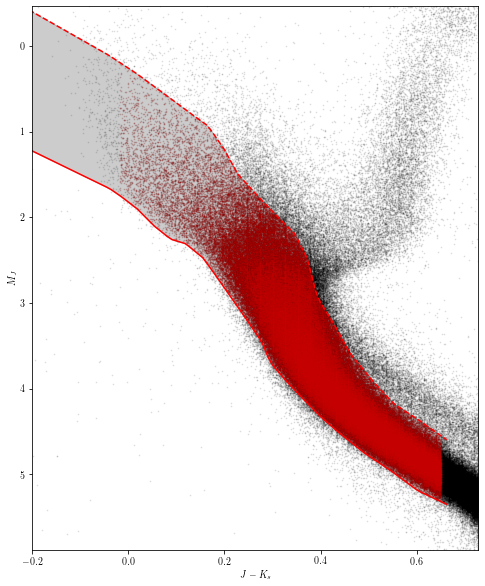

In [13]:
save = False
# save = True # set it to True to save the figure

# HR diagram
plt.figure(figsize=(8,10))
df.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
df_mask_65.viz.scatter("JK", "M_J", c='r', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_lower, 'r--')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
# plt.xlabel(r"")
# plt.ylabel(r"")
# remove numbers from axis
# plt.xticks([])
# plt.yticks([])
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
# if save:
#     plt.savefig(join('img', "HR-diagram.png"), dpi=300)
plt.show()

# Classify the stars based on $J-K_s$ color

these ranges are non-linear

In [14]:
F0 = spectral_types[spectral_types["SpT"] == "F0V"]
G0 = spectral_types[spectral_types["SpT"] == "G0V"]
F0['J-K'].to_numpy()[0], G0['J-K'].to_numpy()[0]


(0.14100000000000001, 0.329)

In [15]:
p = 2.8
jk_s_stretch = np.linspace(0, 0.5**p, 14)
jk_s = np.power(jk_s_stretch, 1/p)-0.1
jk_bound = [np.round(jk,2) for jk in zip(jk_s[:-1], jk_s[1:])]
jk_bound

[array([-0.1,  0.1]),
 array([0.1 , 0.16]),
 array([0.16, 0.2 ]),
 array([0.2 , 0.23]),
 array([0.23, 0.26]),
 array([0.26, 0.28]),
 array([0.28, 0.3 ]),
 array([0.3 , 0.32]),
 array([0.32, 0.34]),
 array([0.34, 0.36]),
 array([0.36, 0.37]),
 array([0.37, 0.39]),
 array([0.39, 0.4 ])]

# Figure out the $\sigma$ size of the groups

Just fit the vertical distribution of the stars in each group with a gaussian.
This is just to get a sense of the size of the groups.

[-0.1  0.1]


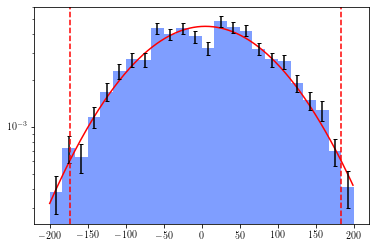


-173.51293011511086 183.1790091349726
178.0
[0.1  0.16]


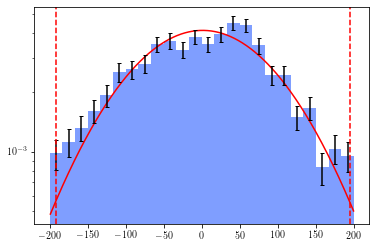


-192.10132587521917 194.34693579087036
193.0
[0.16 0.2 ]


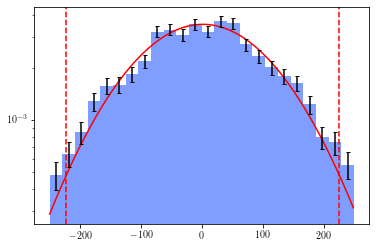


-222.72438095269635 226.1600399504011
224.0
[0.2  0.23]


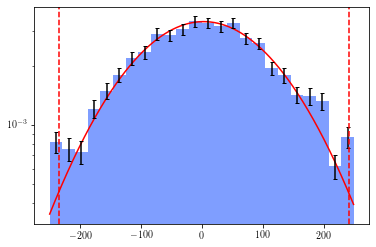


-235.29868660490226 241.2763966479525
238.0
[0.23 0.26]


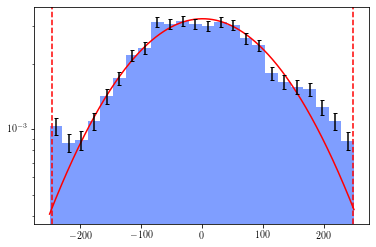


-245.62734642245277 248.53735309009028
247.0
[0.26 0.28]


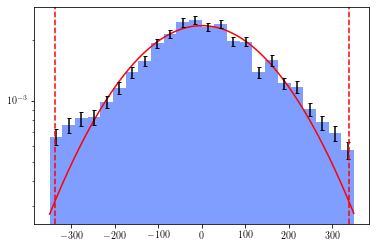


-337.0984460921906 337.647416515104
337.0
[0.28 0.3 ]


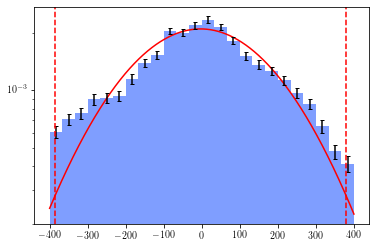


-384.75047823450063 378.5345499425863
382.0
[0.3  0.32]


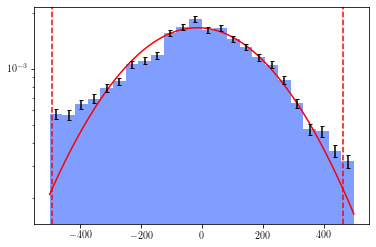


-491.10366917333033 463.0143840828737
477.0
[0.32 0.34]


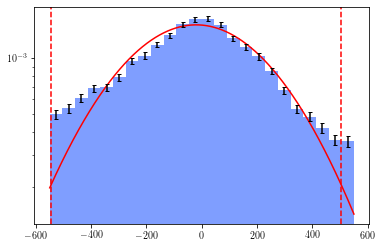


-544.3065683237936 503.7699649987051
524.0
[0.34 0.36]


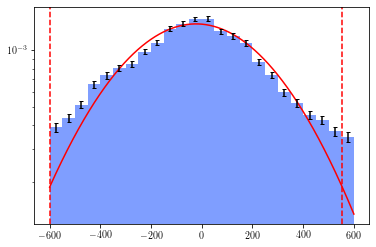


-599.7201452412636 553.8052605592853
577.0
[0.36 0.37]


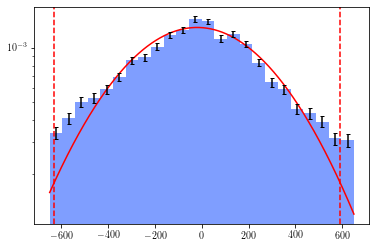


-631.9460802764252 592.3652967816367
612.0
[0.37 0.39]


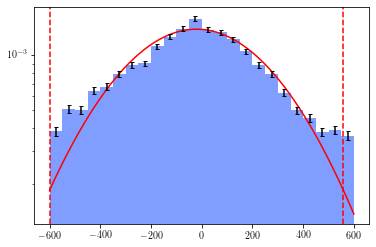


-597.5230282192676 555.9277676947615
577.0
[0.39 0.4 ]


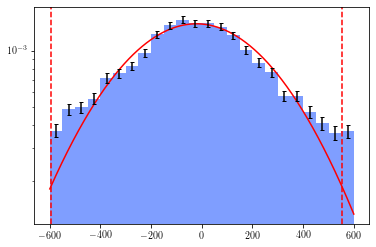


-593.6560255375073 551.5306023889657
573.0


In [16]:
from scipy.optimize import curve_fit

zbounds = np.arange(150, 1001, 50)

zbs = []
sig = 2
for jk_b in jk_bound:
    print(jk_b)
    jk_low, jk_high = jk_b[0], jk_b[1]
    z_low = 0
    z_high = 0
    name = ""
    for i, zbound in enumerate(zbounds):
        df_mask = df_mask_65.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zbound}")
        df_mask = df_mask.extract()
        df_mask["M_J_lower"] = j_lower_interp(df_mask["JK"].to_numpy())
        df_mask["M_J_upper"] = j_upper_interp(df_mask["JK"].to_numpy())
        df_mask["M_J_lower"] = df_mask["M_J_lower"].astype("float64")
        df_mask["M_J_upper"] = df_mask["M_J_upper"].astype("float64")
        df_mask = df_mask.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
        df_mask = df_mask.extract()
        
        zs = df_mask["z"].to_numpy()
        zs = np.sort(zs)
        zcum = np.arange(len(zs))/len(zs)
        popt, pcov = curve_fit(lambda x, mu, sigma: norm.cdf(x, loc=mu, scale=sigma), zs, zcum, p0=[0, 80])
        mu, sigma = popt

        zedge = np.linspace(-zbound, zbound, 25)
        zmid = (zedge[1:]+zedge[:-1])/2
        dz = np.diff(zedge)[0]
        znum, _ = np.histogram(zs, bins=zedge)
        zerr = np.sqrt(znum)
        area = znum.sum()*dz
        zdens, zerr = znum/area, zerr/area
        zlow = mu-sig*sigma
        zhigh = mu+sig*sigma
        if zlow > -zbound and zhigh < zbound:
            z_low = zlow
            z_high = zhigh
            break
    plt.plot(zs, norm.pdf(zs, loc=popt[0], scale=popt[1]), 'r')
    plt.bar(zmid, zdens, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.axvline(zlow, c='r', ls='--')
    plt.axvline(zhigh, c='r', ls='--')        
    plt.yscale("log")
    plt.show()
    print(name)
    print(z_low, z_high)
    zb = (z_high-z_low)/2
    zb = np.round(zb)
    print(zb)
    zbs.append(zb)

2-$\sigma$

In [17]:
np.array(zbs)

array([178., 193., 224., 238., 247., 337., 382., 477., 524., 577., 612.,
       577., 573.])

gaia_(-0.10)_(0.10).hdf5 2368


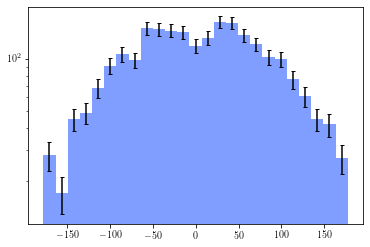

2368
gaia_(0.10)_(0.16).hdf5 2052


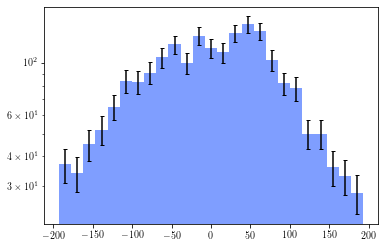

2052
gaia_(0.16)_(0.20).hdf5 2692


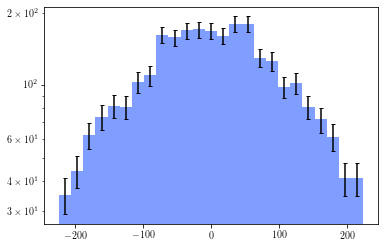

2692
gaia_(0.20)_(0.23).hdf5 3725


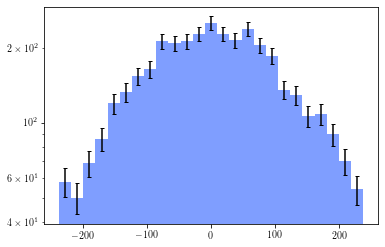

3725
gaia_(0.23)_(0.26).hdf5 5774


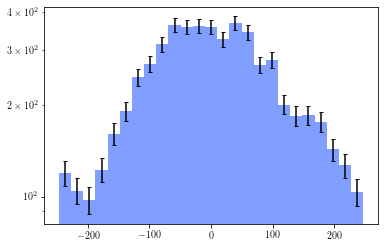

5774
gaia_(0.26)_(0.28).hdf5 6320


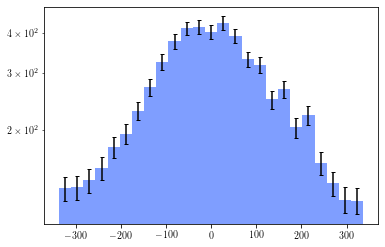

6320
gaia_(0.28)_(0.30).hdf5 8567


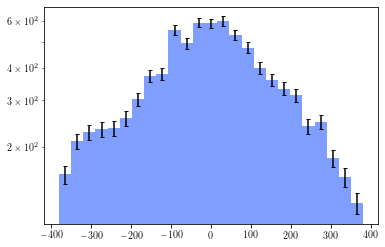

8567
gaia_(0.30)_(0.32).hdf5 11857


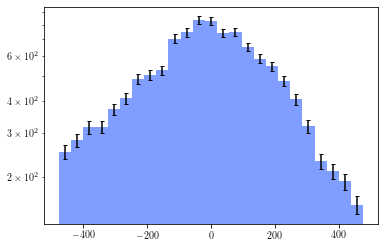

11857
gaia_(0.32)_(0.34).hdf5 13959


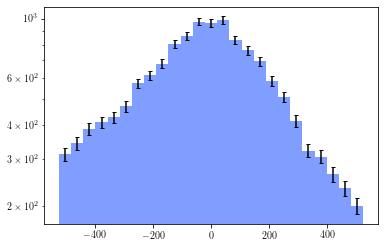

13959
gaia_(0.34)_(0.36).hdf5 17296


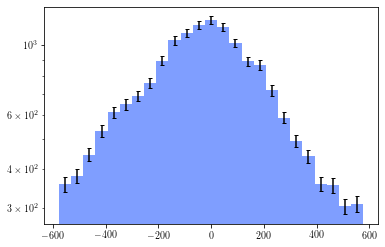

17296
gaia_(0.36)_(0.37).hdf5 9357


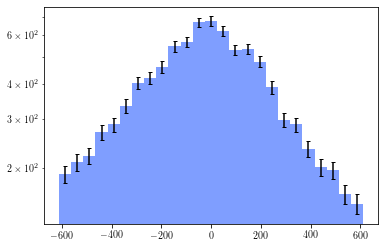

9357
gaia_(0.37)_(0.39).hdf5 17004


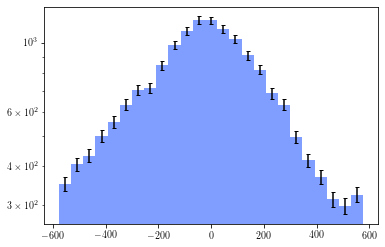

17004
gaia_(0.39)_(0.40).hdf5 8049


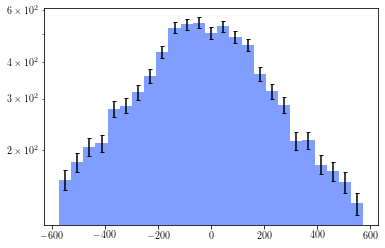

8049


In [18]:
df_mask = []

for jk_b, zb in zip(jk_bound, zbs):
    jk_low, jk_high = jk_b[0], jk_b[1]
    df_color = df.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}")
    df_color = df_color.extract()
    df_color["M_J_lower"] = j_lower_interp(df_color["JK"].to_numpy())
    df_color["M_J_upper"] = j_upper_interp(df_color["JK"].to_numpy())
    df_color["M_J_lower"] = df_color["M_J_lower"].astype("float64")
    df_color["M_J_upper"] = df_color["M_J_upper"].astype("float64")
    df_color = df_color.filter("M_J < M_J_upper").filter("M_J > M_J_lower")
    df_color = df_color.extract()
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    print(name, len(df_color))
    zs = df_color["z"].to_numpy()
    znum, zedge = np.histogram(zs, bins=25)
    zmid = (zedge[1:]+zedge[:-1])/2
    zerr = np.sqrt(znum)
    dz = np.diff(zedge)[0]
    plt.bar(zmid, znum, yerr=zerr, width=dz, alpha=0.5, capsize=2)
    plt.yscale("log")
    plt.show()
    print(len(zs))
    df_mask.append(df_color)

# Metallicity Classification

Based on GUMS exploration, we can get thin disk stars by
* metallicity > -0.5

collect metallicity

because not all stars have metallicity, we let the stars without metallicity to be in the thin disk.

there are two types of metallicity, `Fe/H` and `M/H`.
If both are available, we use `M/H`.
If not exist, let the value be `2`

In [19]:
feh = df_mask_65["feh"].to_numpy()
mh = df_mask_65["mh"].to_numpy()
# combine feh and mh, if both are available, use mh
mask = np.isnan(mh)
mh[mask] = feh[mask]
# if mh is nan, change it to 2
mask = np.isnan(mh)
mh[mask] = -1
df_mask_65["metal"] = mh
df_mask_65.head()

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.00795217,-1.43051,10.581,10.035,AAA,4630919191216607488,23.8987,-11.4323,0.0124114,-20.9869,0.0133436,5.79895,0.0103869,11.8902,12.3491,11.2738,1339.89,1773.77,0.973246,1.21787,2.18222,-0.610213,172.206,171.843,172.716,0.0245,0.0166,0.0314,nan,nan,nan,K,--,52.9082,gaia,0.8756,0.8756,1,5061.04,gspphot,11.0015,9.63379,0,4.5436,gspphot,0.00460005,0.00349998,0,nan,--,nan,nan,nan,0.3846,gspphot,0.0101,0.00999999,0,-0.07,gspspec,0.04,0.05,0,nan,--,nan,nan,nan,0.546,4.39775,172.445,-98.8182,141.323,6.22134,23.0747,0.0124639,0.0132946,18.861,5.08526,0.0354881,0.013666,-14.8615,0.8756,0.502598,54.1678,0.717865,-26.9304,0.412234,-47.2733,0.587861,4.13921,4.95669,0.3846
1,0.00944333,-1.40689,10.062,9.658,AAA,4634292531547062400,80.0372,79.9372,0.0133431,-3.99997,0.0146233,5.62982,0.0121789,11.1101,11.4563,10.5991,1518.17,2843.08,0.773979,1.20112,2.18876,-0.633232,176.564,175.79,180.03,0.0585,0.0429,0.082,-0.08,-0.24,0.08,G,--,-47.79,gaia,0.262876,0.262876,1,5679.02,gspphot,29.4785,43.2471,0,4.4619,gspphot,0.0131001,0.00829983,0,nan,--,nan,nan,nan,0.22,gspspec,0.04,0.01,0,0.03,gspspec,0.04,0.03,0,nan,--,nan,nan,nan,0.404,3.81447,177.626,-105.111,143.187,-78.6303,-14.9411,0.0134173,0.0145552,-12.5796,-66.2024,-0.0298452,-0.14366,18.1393,0.262876,0.157408,-45.9684,0.212644,-27.3261,0.169967,75.8231,0.192268,3.03402,4.34511,0.22
2,0.00197542,-1.37989,7.301,6.858,AAA,4635422588982399616,173.888,162.425,0.0164819,-62.0902,0.0164199,24.9394,0.0130198,8.46708,8.85542,7.91007,829.901,1157.6,0.85791,1.21025,2.19853,-0.659105,39.9083,39.7903,40.0108,0.0025,0.0009,0.0054,nan,nan,nan,G,--,9.83266,gaia,0.14247,0.14247,1,5326.66,gspphot,11.3574,10.6636,0,4.5026,gspphot,0.00760031,0.0216999,0,nan,--,nan,nan,nan,-0.17,gspspec,0.01,0.03,0,0.1,gspspec,0.01,0.03,0,nan,--,nan,nan,nan,0.443,4.28543,40.0972,-24.5559,31.6984,-172.757,19.7995,0.0164781,0.0164237,3.7631,-32.8344,0.00368826,-0.0174251,-3.04673,0.14247,0.0872989,10.0777,0.112651,-32.4936,0.0676481,11.1276,0.0917479,3.40165,4.53412,-0.17
3,0.00430175,-1.37137,8.77,8.402,AAA,4635683001439449856,52.4056,6.08375,0.0144731,-52.0513,0.0170755,6.08407,0.0123706,9.7399,10.0541,9.25917,2948.12,3927.41,0.983343,1.19837,2.20067,-0.667469,164.029,163.609,164.809,0.0013,0.0002,0.0046,-0.15,-0.27,-0.03,G,--,10.9029,gaia,0.168337,0.168337,1,5751.54,gspphot,2.11182,5.79102,0,4.1599,gspphot,0.0024004,0.00159979,0,nan,--,nan,nan,nan,-0.1078,gspphot,0.0059,0.0071,0,0.02,gspspec,0.01,0.02,0,nan,--,nan,nan,nan,0.368,2.69097,164.364,-101.741,129.09,-18.7745,48.9272,0.0146457,0.0169277,38.1184,-14.6269,0.0786192,-0.0318543,23.1889,0.168337,0.121122,32.1583,0.140883,-30.7627,0.0868868,-17.3713,0.115383,2.4284,4.14225,-0.1078
4,0.0146211,-1.3755,10.326,9.838,AAA,4635618095893685248,71.3126,66.8145,0.0181855,-24.9262,0.0187289,5.90025,0.0135359,11.4368,11.8196,10.8873,2167.59,2343.74,0.912029,1.20801,2.1969,-0.663951,168.377,167.915,169.326,0.0778,0.0708,0.0824,-0.05,-0.11,0.03,G,--,30.5657,gaia,0.340513,0.340513,1,5468.21,gspphot,13.2705,8.54102,0,4.5199,gspphot,0.0072999,0.00590038,0,nan,--,nan,nan,nan,0.0573,gspphot,0.0128,0.0107,0,-0.04,gspspec,0.03,0.05,0,nan,--,nan,nan,nan,0.488,4.18035,169.484,-104.442,133.48,-70.8043,8.49968,0.018216,0.0186992,6.82826,-56.881,0.0217038,-0.13131,-13

In [21]:
df_thin = df_mask_65.filter("metal > -0.5").filter("metal < 0.5")
df_thin = df_thin.extract()
df_thin

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,metal
0,0.007952173857691683,-1.4305097809391984,10.581000328063965,10.03499984741211,AAA,4630919191216607488,23.898677825927734,-11.432337330045844,0.012411404401063919,-20.986865106700424,0.013343622907996178,5.7989536702346465,0.010386944748461246,11.89019775390625,12.349108695983887,11.273787498474121,1339.88916015625,1773.7681884765625,0.9732462167739868,1.2178672552108765,2.1822248974591814,-0.610213381765023,172.20570373535156,171.8430938720703,172.71620178222656,0.02449999935925007,0.016599999740719795,0.03139999881386757,nan,nan,nan,K,--,52.90816879272461,gaia,0.8756001591682434,0.8756001591682434,1.0,5061.03515625,gspphot,11.00146484375,9.6337890625,0.0,4.543600082397461,gspphot,0.004600048065185547,0.0034999847412109375,0.0,nan,--,nan,nan,nan,0.3846000134944916,gspphot,0.010100007057189941,0.009999990463256836,0.0,-0.07000000029802322,gspspec,0.03999999910593033,0.05000000074505806,0.0,nan,--,nan,nan,nan,0.5460004806518555,4.397748523260623,172.44490245419334,-98.81823128531313,141.32303969303314,6.221341729418895,23.07469936793523,0.012463924771994607,0.013294578248128389,18.86100169508465,5.085255284726619,0.03548808423919451,0.013665982834339866,-14.861544371355317,0.8756001591682434,0.5025981456637494,54.167759865437134,0.717864992065905,-26.93038823503761,0.4122335468333415,-47.27325057218564,0.5878608753657736,4.139207429566532,4.956685393986543,0.3846000134944916
1,0.009443330810718078,-1.4068876919912512,10.062000274658203,9.657999992370605,AAA,4634292531547062400,80.03723907470703,79.93722242614324,0.013343079015612602,-3.9999700401274243,0.014623326249420643,5.629817906899334,0.012178930453956127,11.110095024108887,11.456314086914062,10.599123001098633,1518.1749267578125,2843.079345703125,0.7739794254302979,1.2011168003082275,2.1887579247061915,-0.633232475275951,176.5635986328125,175.789794921875,180.02969360351562,0.05849999934434891,0.042899999767541885,0.0820000022649765,-0.07999999821186066,-0.23999999463558197,0.07999999821186066,G,--,-47.79001235961914,gaia,0.26287636160850525,0.26287636160850525,1.0,5679.02001953125,gspphot,29.478515625,43.2470703125,0.0,4.461900234222412,gspphot,0.013100147247314453,0.008299827575683594,0.0,nan,--,nan,nan,nan,0.2199999988079071,gspspec,0.03999999165534973,0.01000000536441803,0.0,0.029999999329447746,gspspec,0.03999999910593033,0.029999999329447746,0.0,nan,--,nan,nan,nan,0.40400028228759766,3.8144720150714813,177.62563843752412,-105.11061177622882,143.18738325133592,-78.6303006427475,-14.941054526363132,0.013417307513630478,0.014555249475654867,-12.579554015090025,-66.2024298494398,-0.0298452352969122,-0.1436599164229874,18.13929589425119,0.26287636160850525,0.15740752313701145,-45.96842835046593,0.21264428330506527,-27.326072934701195,0.16996727994296695,75.82310901664022,0.19226774705543745,3.0340236167686374,4.345114318156106,0.2199999988079071
2,0.001975416007284742,-1.3798921433985867,7.301000118255615,6.857999801635742,AAA,4635422588982399616,173.8883514404297,162.425270464122,0.016481924802064896,-62.09016992304387,0.016419915482401848,24.939420796749136,0.013019759207963943,8.467083930969238,8.855419158935547,7.910074234008789,829.9010620117188,1157.595458984375,0.8579095005989075,1.2102466821670532,2.1985319392271805,-0.65910507457

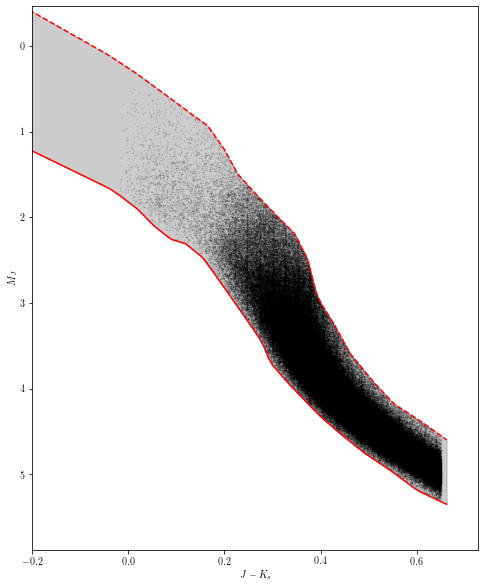

In [22]:
save = False
# save = True # set it to True to save the figure

# HR diagram
plt.figure(figsize=(8,10))
df_thin.viz.scatter("JK", "M_J", c='k', alpha=0.1, s=0.5, length_check=False)
plt.plot(jks, j_upper, 'r')
plt.plot(jks, j_lower, 'r--')
plt.fill_between(jks, j_upper, j_lower, alpha=0.2, color="k")
plt.xlabel(r"$J-K_s$")
plt.ylabel(r"$M_J$")
# plt.xlabel(r"")
# plt.ylabel(r"")
# remove numbers from axis
# plt.xticks([])
# plt.yticks([])
plt.xlim(-0.2, jks[-1]*1.1)
plt.ylim(j_lower.min()*0.9, j_upper.max()*1.1)
plt.gca().invert_yaxis()
# if save:
#     plt.savefig(join('img', "HR-diagram.png"), dpi=300)
plt.show()

In [30]:
zb

573.0

841 gaia_(-0.10)_(0.10).hdf5


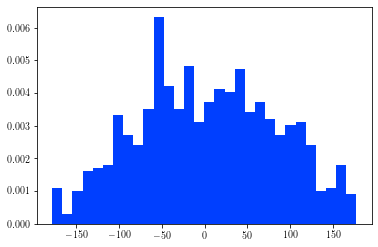

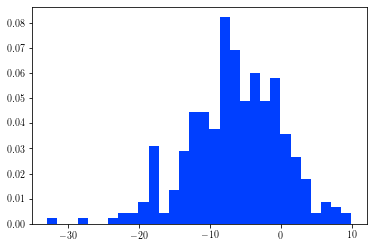

export(hdf5) [########################################] 100.00% elapsed time  :    10.26s =  0.2m =  0.0h    
 888 gaia_(0.10)_(0.16).hdf5


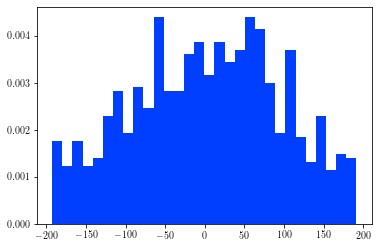

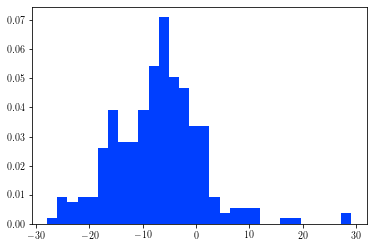

export(hdf5) [########################################] 100.00% elapsed time  :     9.52s =  0.2m =  0.0h   
 1498 gaia_(0.16)_(0.20).hdf5


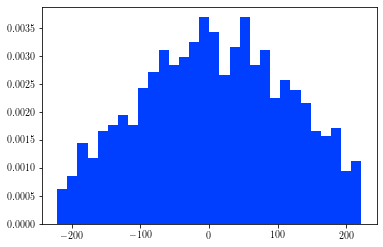

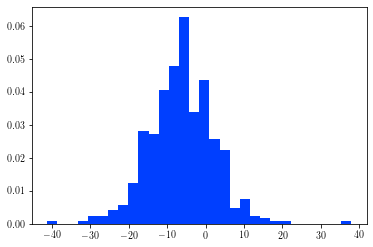

export(hdf5) [########################################] 100.00% elapsed time  :     9.55s =  0.2m =  0.0h 
 2869 gaia_(0.20)_(0.23).hdf5


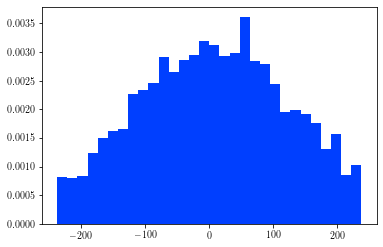

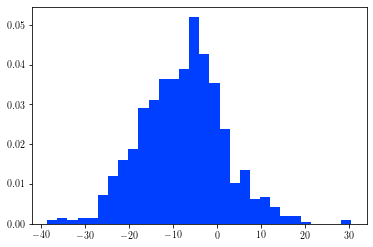

export(hdf5) [########################################] 100.00% elapsed time  :     9.49s =  0.2m =  0.0h  
 4729 gaia_(0.23)_(0.26).hdf5


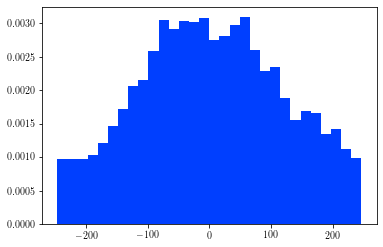

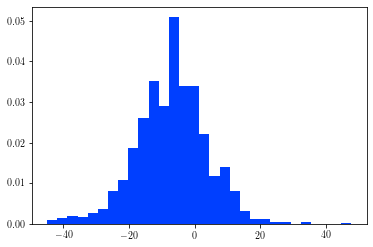

export(hdf5) [########################################] 100.00% elapsed time  :     9.35s =  0.2m =  0.0h 
 5218 gaia_(0.26)_(0.28).hdf5


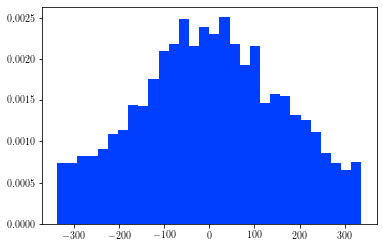

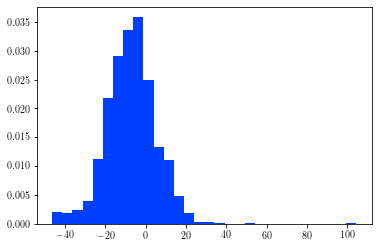

export(hdf5) [########################################] 100.00% elapsed time  :     9.49s =  0.2m =  0.0h   
 7056 gaia_(0.28)_(0.30).hdf5


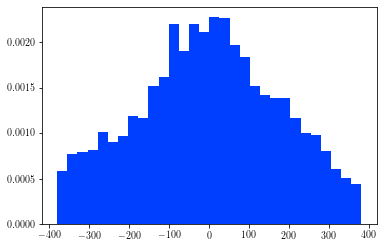

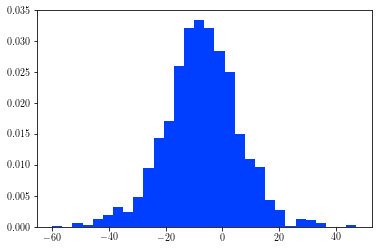

export(hdf5) [########################################] 100.00% elapsed time  :     9.39s =  0.2m =  0.0h 
 9747 gaia_(0.30)_(0.32).hdf5


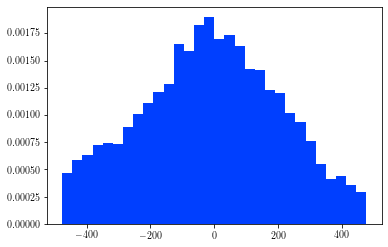

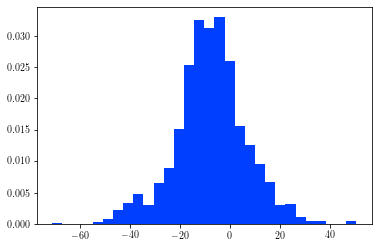

export(hdf5) [########################################] 100.00% elapsed time  :     9.55s =  0.2m =  0.0h   
 11540 gaia_(0.32)_(0.34).hdf5


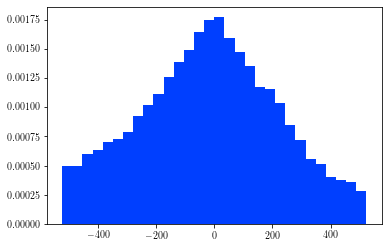

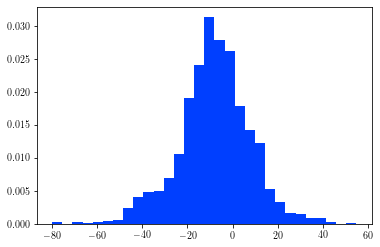

export(hdf5) [########################################] 100.00% elapsed time  :     9.69s =  0.2m =  0.0h       
 14340 gaia_(0.34)_(0.36).hdf5


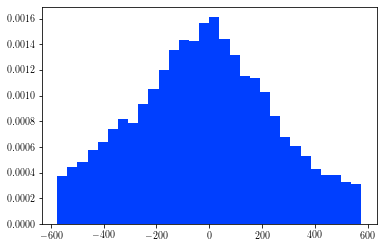

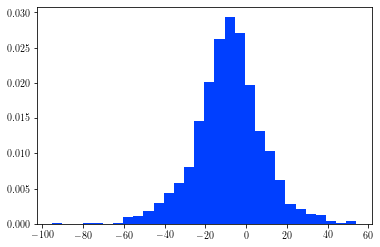

export(hdf5) [########################################] 100.00% elapsed time  :     9.50s =  0.2m =  0.0h   
 7871 gaia_(0.36)_(0.37).hdf5


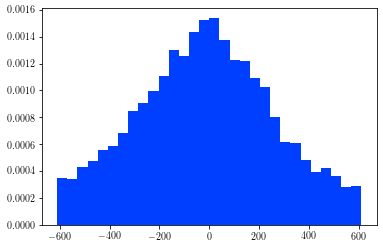

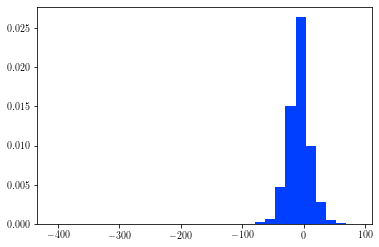

export(hdf5) [########################################] 100.00% elapsed time  :     9.56s =  0.2m =  0.0h  
 14517 gaia_(0.37)_(0.39).hdf5


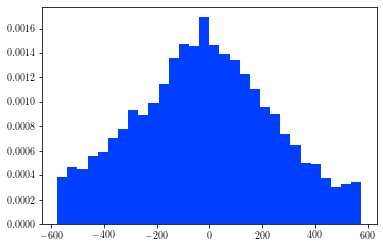

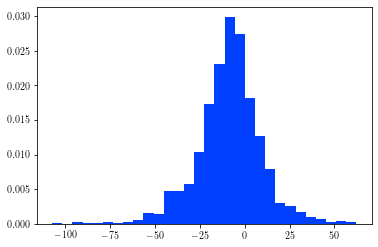

export(hdf5) [########################################] 100.00% elapsed time  :     9.40s =  0.2m =  0.0h  
 7005 gaia_(0.39)_(0.40).hdf5


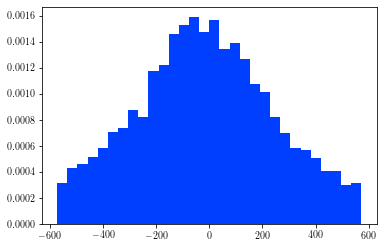

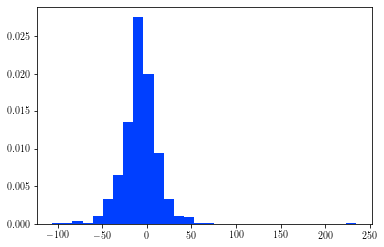

export(hdf5) [########################################] 100.00% elapsed time  :     9.63s =  0.2m =  0.0h   
 

In [42]:
for (jk_low, jk_high), zb in zip(jk_bound, zbs):
    name = f"gaia_({jk_low:.2f})_({jk_high:.2f}).hdf5"
    df_c = df_thin.filter(f"JK < {jk_high}").filter(f"JK > {jk_low}").filter(f"abs(z) < {zb}")
    # print(name, len(df_c))
    # print([jk_low, jk_high], zb)
    # break
    # plot
    z = df_c["z"].to_numpy()
    mask = np.isnan(z)
    z = z[~mask]

    print(len(df_c), name)
    plt.hist(z, bins=30, density=True)
    plt.show()
    df_w = df_c.filter("abs(z) < 50")
    w = df_w["w"].to_numpy()
    mask = np.isnan(w)
    w = w[~mask]
    plt.hist(w, bins=30, density=True)
    plt.show()
    df_c.export(join(data_dir, name), progress=True)
    # break